In [ ]:
import os

# Tạo folder tên 'my_folder'
folder_name = 'crash_prediction'
os.makedirs(folder_name, exist_ok=True)

print(f"Đã tạo thư mục: {folder_name}")

Đã tạo thư mục: crash_prediction


In [ ]:
import pandas as pd


PORTFOLIO_STOCKS = ["FPT", "SSI", "VCB", "VHM", "HPG", "GAS", "MSN", "MWG", "GVR", "VCG"]

fin_df = pd.DataFrame()
# Load price data of all stocks in portfolio, in price/1d/ folder, into a new df with a date column, then column name is stock name, and a column is average percentage change of price of all stocks in portfolio
for stock in PORTFOLIO_STOCKS:
    # Add the date to the new df
    price_data = pd.read_csv(f"./price/{stock}.csv")
    fin_df["time"] = price_data["time"]
    # Calculate the percentage change of price
    price_data["pct_change"] = price_data["close"].pct_change()

    # Add the average percentage change to the new df
    fin_df[stock] = price_data["pct_change"]

# Calculate the average percentage change of price of all stocks in portfolio by each day
fin_df["avg_pct_change"] = fin_df.iloc[:, 1:].mean(axis=1)

fin_df

,time,FPT,SSI,VCB,VHM,HPG,GAS,MSN,MWG,GVR,VCG,avg_pct_change
0,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-03,0.019691,-0.006135,-0.012696,0.003681,0.003717,-0.007225,0.001377,-0.009934,-0.017488,-0.016667,-0.004168
2,2024-12-04,-0.010345,-0.010288,0.005305,-0.019560,-0.011111,-0.001456,-0.008253,-0.028428,-0.017799,-0.005650,-0.010759
3,2024-12-05,0.034843,0.068607,0.005437,0.032419,0.043071,0.004373,0.022191,0.049914,0.032949,0.022727,0.031653
4,2024-12-06,0.006734,0.025292,0.002067,0.002415,-0.008977,0.004354,-0.004071,0.001639,0.022329,-0.008333,0.004345
...,...,...,...,...,...,...,...,...,...,...,...,...
83,2025-04-04,-0.004405,-0.034553,-0.004975,0.020284,-0.029586,-0.060800,-0.055375,-0.034735,-0.069024,0.027295,-0.024587
84,2025-04-08,-0.069912,-0.069474,-0.070000,-0.065606,-0.069106,-0.069847,-0.068966,-0.069129,-0.068716,-0.067633,-0.068839
85,2025-04-09,0.001903,-0.067873,-0.059140,0.031915,-0.069869,-0.069597,-0.068519,-0.059003,-0.069903,-0.056995,-0.048708
86,2025-04-10,0.069326,0.067961,0.068571,0.068041,0.068075,0.068898,0.069583,0.069189,0.068894,0.068681,0.068722


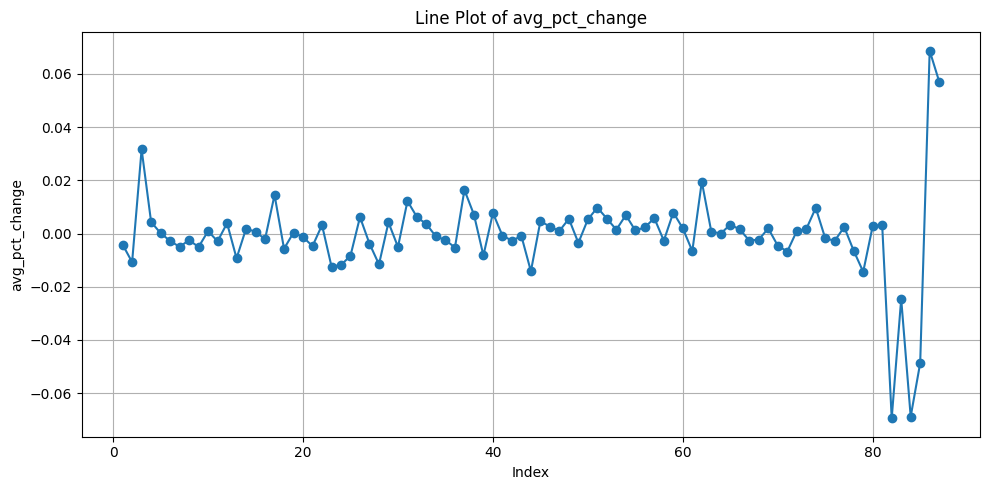

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame bạn có và 'your_column' là tên cột bạn muốn vẽ
# Nếu có cột thời gian thì nên dùng nó làm index hoặc trục x

def plot_line(df, column, x_column=None, title=None):
    plt.figure(figsize=(10, 5))

    if x_column:
        plt.plot(df[x_column], df[column], marker='o')
        plt.xlabel(x_column)
    else:
        plt.plot(df[column], marker='o')
        plt.xlabel("Index")

    plt.ylabel(column)
    plt.title(title or f"Line Plot of {column}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_line(fin_df, column="avg_pct_change")

In [ ]:
# Load crash prediction data
crash_prediction_data = pd.read_csv("crash_predictions.csv")

# Map crash_prediction "Yes/No" to 1/0
crash_prediction_data["crash_prediction"] = crash_prediction_data["crash_prediction"].map({"Yes": 0, "No": 1})

# Take only YYYY-MM-DD from time column
crash_prediction_data["time"] = crash_prediction_data["prediction_date"].str[:10]

# Drop the explanation column
crash_prediction_data = crash_prediction_data.drop(columns=["full_response"])

# Merge crash_prediction_data with fin_df on time column
crash_prediction_data = crash_prediction_data.merge(fin_df[["avg_pct_change", "time"]], on="time", how="left")

# Add a column verdict: if crash_prediction_data["crash"] == 1 and crash_prediction_data["avg_pct_change"] < -0.02 then 1 else 0
crash_prediction_data["kết quả"] = crash_prediction_data.apply(
    lambda row: 1 if (row["crash_prediction"] == 0 and row["avg_pct_change"] < -0.02)
    or (row["crash_prediction"] == 1 and row["avg_pct_change"] > -0.02)
    else 0,
    axis=1)


# crash_prediction_data = crash_prediction_data.iloc[:-7]
crash_prediction_data

,prediction_date,crash_prediction,time,avg_pct_change,kết quả
0,2025-02-05T01:00:00+07:00,0,2025-02-05,-0.000775,0
1,2025-02-06T01:00:00+07:00,1,2025-02-06,-0.002680,1
2,2025-02-07T01:00:00+07:00,0,2025-02-07,-0.000946,0
3,2025-02-10T01:00:00+07:00,0,2025-02-10,-0.014179,0
4,2025-02-11T01:00:00+07:00,0,2025-02-11,0.004614,0
5,2025-02-12T01:00:00+07:00,0,2025-02-12,0.002617,0
6,2025-02-13T01:00:00+07:00,1,2025-02-13,0.000958,1
7,2025-02-14T01:00:00+07:00,0,2025-02-14,0.005537,0
8,2025-02-17T01:00:00+07:00,0,2025-02-17,-0.003521,0
9,2025-02-18T01:00:00+07:00,1,2025-02-18,0.005307,1


In [ ]:
import pandas as pd
import re

# Đọc nội dung file predict.txt với mã hóa UTF-8
with open("predict.txt", "r", encoding="utf-8") as file:
    content = file.read()

# Trích xuất ngày và giá trị Crash
lines = content.splitlines()
dates = []
crash_values = []

for line in lines:
    # Tìm ngày (định dạng DD/MM)
    date_match = re.match(r"(\d{1,2})/(\d{1,2})", line)
    if date_match:
        day, month = date_match.groups()
        # Định dạng ngày thành "2025-MM-DD"
        date_str = f"2025-{int(month):02d}-{int(day):02d}"
        dates.append(date_str)
    # Tìm giá trị Crash
    if "Crash: Yes" in line:
        crash_values.append("Yes")
    elif "Crash: No" in line:
        crash_values.append("No")
# Xóa các giá trị trùng lặp trong 'dates' và giữ thứ tự
seen = set()
unique_dates = []
for date in dates:
    if date not in seen:
        unique_dates.append(date)
        seen.add(date)

# Đảm bảo 2 danh sách cùng độ dài
min_len = min(len(unique_dates), len(crash_values))
unique_dates = unique_dates[:min_len]
crash_values = crash_values[:min_len]

# Tạo DataFrame sau khi làm sạch
crash_prediction_data2 = pd.DataFrame({
    "time": unique_dates,
    "crash_prediction": crash_values
})
# # Tạo DataFrame crash_prediction_data
# crash_prediction_data = pd.DataFrame({
#     "time": dates,
#     "crash_prediction": crash_values
# })

# Ánh xạ crash_prediction: "Yes" = 0, "No" = 1 (theo logic trước đó)
crash_prediction_data2["crash_prediction"] = crash_prediction_data2["crash_prediction"].map({"Yes": 0, "No": 1})

# Giả sử fin_df đã được tạo từ các bước trước
# fin_df có cột "time" và "avg_pct_change"
# Ví dụ: fin_df = pd.DataFrame({"time": ["2025-02-05", ...], "avg_pct_change": [-0.000775, ...]})

# Merge crash_prediction_data với fin_df
crash_prediction_data2 = crash_prediction_data2.merge(fin_df[["avg_pct_change", "time"]], on="time", how="left")

# Thêm cột verdict
crash_prediction_data2["verdict"] = crash_prediction_data2.apply(
    lambda row: 1 if (row["crash_prediction"] == 0 and row["avg_pct_change"] < -0.02)
    or (row["crash_prediction"] == 1 and row["avg_pct_change"] > -0.02)
    else 0,
    axis=1
)

# Hiển thị kết quả
crash_prediction_data2

,time,crash_prediction,avg_pct_change,verdict
0,2025-02-05,1,-0.000775,1
1,2025-02-06,0,-0.002680,0
2,2025-02-07,0,-0.000946,0
3,2025-02-10,1,-0.014179,1
4,2025-02-11,0,0.004614,0
5,2025-02-12,0,0.002617,0
6,2025-02-13,0,0.000958,0
7,2025-02-14,0,0.005537,0
8,2025-02-17,1,-0.003521,1
9,2025-02-18,1,0.005307,1


In [ ]:
print("Overall accuracy:", crash_prediction_data["verdict"].mean())

# not crash accuracy
crash_prediction_data_pred_not_crash = crash_prediction_data[crash_prediction_data["crash_prediction"] == 1]
crash_prediction_data_pred_crash = crash_prediction_data[crash_prediction_data["crash_prediction"] == 0]
crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0
print("Accuracy (model predicted not crash, and the stock price not crash < -2%):", crash_prediction_data_pred_not_crash["verdict"].mean())
print("Accuracy (model predicted not crash, and the stock price change is positive):", crash_prediction_data_pred_not_crash["go_up"].mean())
print("Accuracy (model predicted crash, and the stock price change is < -2%):", crash_prediction_data_pred_crash["verdict"].mean())
print("Accuracy (model predicted crash, and the stock price change is negative):", crash_prediction_data_pred_crash["go_down"].mean())

Overall accuracy: 0.5263157894736842
Accuracy (model predicted not crash, and the stock price not crash < -2%): 1.0
Accuracy (model predicted not crash, and the stock price change is positive): 0.75
Accuracy (model predicted crash, and the stock price change is < -2%): 0.0
Accuracy (model predicted crash, and the stock price change is negative): 0.5


C:\Users\admin\AppData\Local\Temp\ipykernel_19076\1014299980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
C:\Users\admin\AppData\Local\Temp\ipykernel_19076\1014299980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0


In [ ]:
import pandas as pd

# Tính toán các chỉ số cho một DataFrame cụ thể
def calculate_metrics(df):
    overall_accuracy = df["verdict"].mean()

    pred_not_crash = df[df["crash_prediction"] == 1].copy()
    pred_crash = df[df["crash_prediction"] == 0].copy()

    pred_not_crash["go_up"] = pred_not_crash["avg_pct_change"] >= 0
    pred_crash["go_down"] = pred_crash["avg_pct_change"] < 0

    accuracy_not_crash_verdict = pred_not_crash["verdict"].mean()
    accuracy_not_crash_up = pred_not_crash["go_up"].mean()
    accuracy_crash_verdict = pred_crash["verdict"].mean()
    accuracy_crash_down = pred_crash["go_down"].mean()

    return {
        "Overall Accuracy": overall_accuracy,
        "Accuracy (Not Crash & Verdict)": accuracy_not_crash_verdict,
        "Accuracy (Not Crash & Price Up)": accuracy_not_crash_up,
        "Accuracy (Crash & Verdict)": accuracy_crash_verdict,
        "Accuracy (Crash & Price Down)": accuracy_crash_down
    }

# Tính toán cho cả hai dataframe
metrics1 = calculate_metrics(crash_prediction_data)
metrics2 = calculate_metrics(crash_prediction_data2)

# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    "PageRank": metrics1,
    "TPPR": metrics2
})

# Hiển thị bảng so sánh
print(comparison_df)


                                 PageRank      TPPR
Overall Accuracy                 0.526316  0.710526
Accuracy (Not Crash & Verdict)   1.000000  1.000000
Accuracy (Not Crash & Price Up)  0.750000  0.592593
Accuracy (Crash & Verdict)       0.000000  0.000000
Accuracy (Crash & Price Down)    0.500000  0.272727


<Figure size 1200x600 with 0 Axes>

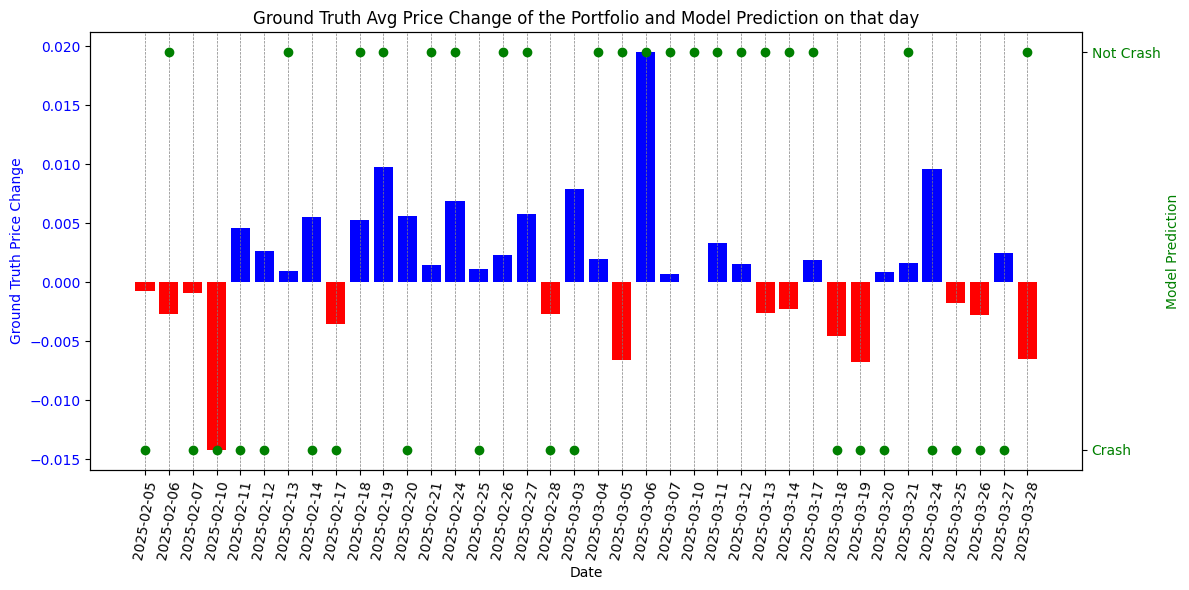

In [ ]:
# Plot the avg_pct_change in bar chart, and the verdict as a line in that chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for avg_pct_change with color based on value
colors = ['r' if x < 0 else 'b' for x in crash_prediction_data["avg_pct_change"]]
for i in range(len(crash_prediction_data["time"])):
    ax1.axvline(x=crash_prediction_data["time"][i], color='gray', linestyle='--', linewidth=0.5)
ax1.bar(crash_prediction_data["time"], crash_prediction_data["avg_pct_change"], color=colors, label='Average Percentage Change')
ax1.set_xlabel('Date')
ax1.set_ylabel('Ground Truth Price Change', color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.xticks(rotation=80)

# Create a second y-axis for the verdict
ax2 = ax1.twinx()
ax2.scatter(crash_prediction_data["time"], crash_prediction_data["crash_prediction"], color='g', marker='o')
ax2.set_xlabel('Date')
ax2.set_ylabel('Model Prediction', color='g')
ax2.tick_params(axis='y', labelcolor='g', labelsize=10)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Crash', 'Not Crash'])

# Adding titles and labels
plt.title('Ground Truth Avg Price Change of the Portfolio and Model Prediction on that day')
plt.xlabel('Date')

fig.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

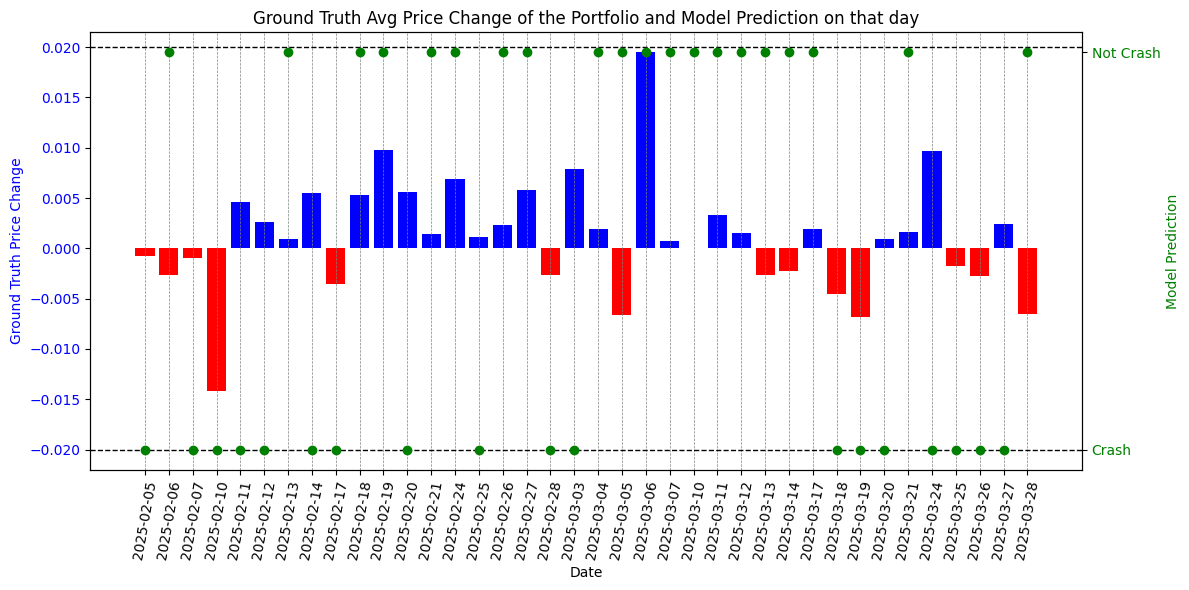

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for avg_pct_change with color based on value
colors = ['r' if x < 0 else 'b' for x in crash_prediction_data["avg_pct_change"]]

# Vẽ đường dọc cho từng ngày
for i in range(len(crash_prediction_data["time"])):
    ax1.axvline(x=crash_prediction_data["time"][i], color='gray', linestyle='--', linewidth=0.5)

# Vẽ biểu đồ cột cho avg_pct_change
ax1.bar(crash_prediction_data["time"], crash_prediction_data["avg_pct_change"], color=colors)

# Vẽ 2 đường ngưỡng tại -0.02 và 0.02
ax1.axhline(y=-0.02, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=0.02, color='black', linestyle='--', linewidth=1)

# Cài đặt nhãn trục và màu sắc
ax1.set_xlabel('Date')
ax1.set_ylabel('Ground Truth Price Change', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=80)

# Create a second y-axis for the verdict
ax2 = ax1.twinx()
ax2.scatter(crash_prediction_data["time"], crash_prediction_data["crash_prediction"], color='g', marker='o')
ax2.set_ylabel('Model Prediction', color='g')
ax2.tick_params(axis='y', labelcolor='g', labelsize=10)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Crash', 'Not Crash'])

# Tiêu đề và bố cục
plt.title('Ground Truth Avg Price Change of the Portfolio and Model Prediction on that day')
plt.xlabel('Date')

fig.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

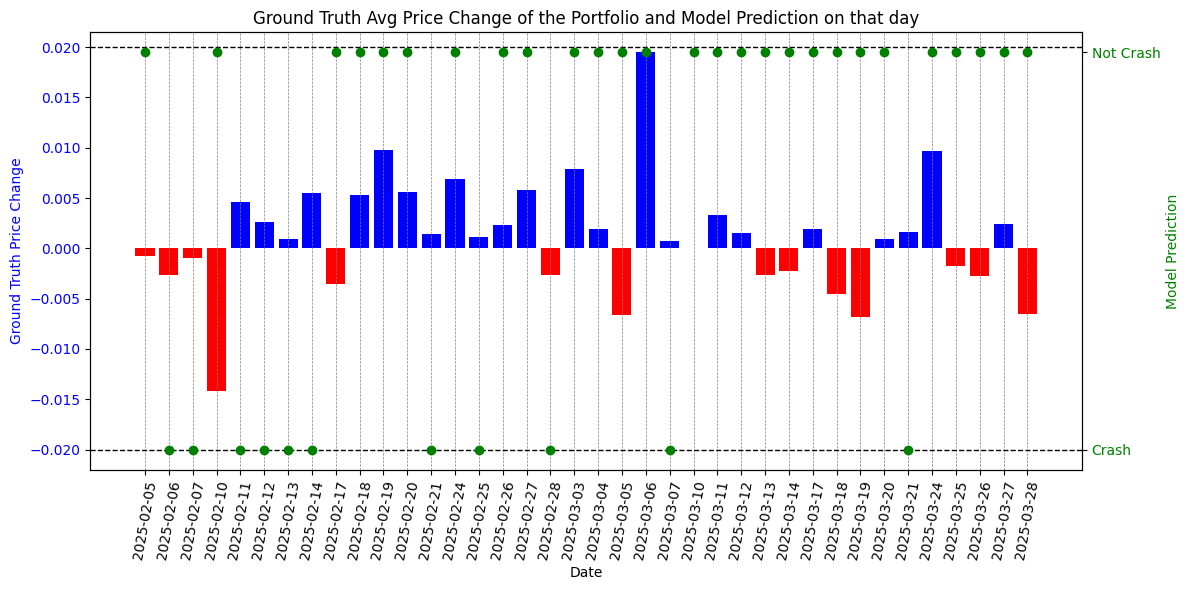

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for avg_pct_change with color based on value
colors = ['r' if x < 0 else 'b' for x in crash_prediction_data2["avg_pct_change"]]

# Vẽ đường dọc cho từng ngày
for i in range(len(crash_prediction_data2["time"])):
    ax1.axvline(x=crash_prediction_data2["time"][i], color='gray', linestyle='--', linewidth=0.5)

# Vẽ biểu đồ cột cho avg_pct_change
ax1.bar(crash_prediction_data2["time"], crash_prediction_data2["avg_pct_change"], color=colors)

# Vẽ 2 đường ngưỡng tại -0.02 và 0.02
ax1.axhline(y=-0.02, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=0.02, color='black', linestyle='--', linewidth=1)

# Cài đặt nhãn trục và màu sắc
ax1.set_xlabel('Date')
ax1.set_ylabel('Ground Truth Price Change', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=80)

# Create a second y-axis for the verdict
ax2 = ax1.twinx()
ax2.scatter(crash_prediction_data2["time"], crash_prediction_data2["crash_prediction"], color='g', marker='o')
ax2.set_ylabel('Model Prediction', color='g')
ax2.tick_params(axis='y', labelcolor='g', labelsize=10)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Crash', 'Not Crash'])

# Tiêu đề và bố cục
plt.title('Ground Truth Avg Price Change of the Portfolio and Model Prediction on that day')
plt.xlabel('Date')

fig.tight_layout()
plt.show()

TPPR

In [ ]:
# import pandas as pd
# import os

# folder_path = "crash_prediction"
# dfs = []

# # Hàm đọc file với fallback mã hóa
# def read_csv_with_fallback(file_path):
#     try:
#         return pd.read_csv(file_path, encoding="utf-8")
#     except UnicodeDecodeError:
#         return pd.read_csv(file_path, encoding="ISO-8859-1")  # hoặc thử 'cp1252'

# for filename in os.listdir(folder_path):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(folder_path, filename)
#         try:
#             df = read_csv_with_fallback(file_path)
#             if {"prediction_date", "crash_prediction"}.issubset(df.columns):
#                 dfs.append(df[["prediction_date", "crash_prediction"]])
#         except Exception as e:
#             print(f" Error reading {filename}: {e}")

# # Gộp lại
# crash_prediction_data2 = pd.concat(dfs, ignore_index=True)
# # Map crash_prediction "Yes/No" to 1/0
# crash_prediction_data2["crash_prediction"] = crash_prediction_data2["crash_prediction"].map({"Yes": 0, "No": 1})

# # Take only YYYY-MM-DD from time column
# crash_prediction_data2["time"] = crash_prediction_data2["prediction_date"].str[:10]

# # Drop the explanation column
# # crash_prediction_data = crash_prediction_data.drop(columns=["full_response"])

# # Merge crash_prediction_data with fin_df on time column
# crash_prediction_data2 = crash_prediction_data2.merge(fin_df[["avg_pct_change", "time"]], on="time", how="left")

# # Add a column verdict: if crash_prediction_data["crash"] == 1 and crash_prediction_data["avg_pct_change"] < -0.02 then 1 else 0
# crash_prediction_data2["kết quả"] = crash_prediction_data2.apply(
#     lambda row: 1 if (row["crash_prediction"] == 0 and row["avg_pct_change"] < -0.02)
#     or (row["crash_prediction"] == 1 and row["avg_pct_change"] > -0.02)
#     else 0,
#     axis=1)


# crash_prediction_data = crash_prediction_data.iloc[:-7]
crash_prediction_data2


,prediction_date,crash_prediction,time,avg_pct_change,kết quả
0,2025-02-05T01:00:00,1,2025-02-05,-0.000775,1
1,2025-02-06T01:00:00,1,2025-02-06,-0.002680,1
2,2025-02-07T01:00:00,1,2025-02-07,-0.000946,1
3,2025-02-10T01:00:00,1,2025-02-10,-0.014179,1
4,2025-02-11T01:00:00,0,2025-02-11,0.004614,0
5,2025-02-12T01:00:00,1,2025-02-12,0.002617,1
6,2025-02-13T01:00:00,1,2025-02-13,0.000958,1
7,2025-02-14T01:00:00,0,2025-02-14,0.005537,0
8,2025-02-17T01:00:00,1,2025-02-17,-0.003521,1
9,2025-02-18T01:00:00,1,2025-02-18,0.005307,1


In [ ]:
print("Overall accuracy:", crash_prediction_data2["kết quả"].mean())

# not crash accuracy
crash_prediction_data_pred_not_crash = crash_prediction_data2[crash_prediction_data2["crash_prediction"] == 1]
crash_prediction_data_pred_crash = crash_prediction_data2[crash_prediction_data2["crash_prediction"] == 0]
crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0
print("Accuracy (model predicted not crash, and the stock price not crash < -2%):", crash_prediction_data_pred_not_crash["kết quả"].mean())
print("Accuracy (model predicted not crash, and the stock price change is positive):", crash_prediction_data_pred_not_crash["go_up"].mean())
print("Accuracy (model predicted crash, and the stock price change is < -2%):", crash_prediction_data_pred_crash["kết quả"].mean())
print("Accuracy (model predicted crash, and the stock price change is negative):", crash_prediction_data_pred_crash["go_down"].mean())

Overall accuracy: 0.7111111111111111
Accuracy (model predicted not crash, and the stock price not crash < -2%): 0.9142857142857143
Accuracy (model predicted not crash, and the stock price change is positive): 0.5142857142857142
Accuracy (model predicted crash, and the stock price change is < -2%): 0.0
Accuracy (model predicted crash, and the stock price change is negative): 0.1


<ipython-input-25-e540979d1b32>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
<ipython-input-25-e540979d1b32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0


In [ ]:
import pandas as pd

# Tính toán các chỉ số cho một DataFrame cụ thể
def calculate_metrics(df):
    overall_accuracy = df["kết quả"].mean()

    pred_not_crash = df[df["crash_prediction"] == 1].copy()
    pred_crash = df[df["crash_prediction"] == 0].copy()

    pred_not_crash["go_up"] = pred_not_crash["avg_pct_change"] >= 0
    pred_crash["go_down"] = pred_crash["avg_pct_change"] < 0

    accuracy_not_crash_verdict = pred_not_crash["kết quả"].mean()
    accuracy_not_crash_up = pred_not_crash["go_up"].mean()
    accuracy_crash_verdict = pred_crash["kết quả"].mean()
    accuracy_crash_down = pred_crash["go_down"].mean()

    return {
        "Overall Accuracy": overall_accuracy,
        "Accuracy (Not Crash & Verdict)": accuracy_not_crash_verdict,
        "Accuracy (Not Crash & Price Up)": accuracy_not_crash_up,
        "Accuracy (Crash & Verdict)": accuracy_crash_verdict,
        "Accuracy (Crash & Price Down)": accuracy_crash_down
    }

# Tính toán cho cả hai dataframe
metrics1 = calculate_metrics(crash_prediction_data)
metrics2 = calculate_metrics(crash_prediction_data2)

# Tạo bảng so sánh
comparison_df = pd.DataFrame({
    "PageRank": metrics1,
    "TPPR": metrics2
})

# Hiển thị bảng so sánh
print(comparison_df)

                                 PageRank      TPPR
Overall Accuracy                 0.511111  0.711111
Accuracy (Not Crash & Verdict)   1.000000  0.914286
Accuracy (Not Crash & Price Up)  0.750000  0.514286
Accuracy (Crash & Verdict)       0.120000  0.000000
Accuracy (Crash & Price Down)    0.520000  0.100000


In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
crash_prediction_data=pd.read_csv("/content/crash1.csv")
crash_prediction_data2=pd.read_csv("/content/crash2.csv")
crash_prediction_data3=pd.read_csv("/content/crash3.csv")

In [ ]:
# Tạo nhãn thực tế từ avg_pct_change
crash_prediction_data2["true_label"] = (crash_prediction_data2["avg_pct_change"] > -0.02).astype(int)

# y_true là nhãn thật
y_true = crash_prediction_data2["true_label"]

# y_pred là dự đoán từ mô hình
y_pred = crash_prediction_data2["crash_prediction"]

# Tính các chỉ số
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.91      0.78      0.84        41

    accuracy                           0.73        45
   macro avg       0.51      0.52      0.49        45
weighted avg       0.84      0.73      0.78        45



In [ ]:
# Tạo nhãn thực tế từ avg_pct_change
crash_prediction_data["true_label"] = (crash_prediction_data["avg_pct_change"] > -0.02).astype(int)

# y_true là nhãn thật
y_true = crash_prediction_data["true_label"]

# y_pred là dự đoán từ mô hình
y_pred = crash_prediction_data["crash_prediction"]

# Tính các chỉ số
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.16      1.00      0.28         4
           1       1.00      0.49      0.66        41

    accuracy                           0.53        45
   macro avg       0.58      0.74      0.47        45
weighted avg       0.93      0.53      0.62        45



In [ ]:
from sklearn.metrics import roc_auc_score

# Với PR (crash_prediction_data)
y_true = crash_prediction_data["kết quả"]
y_score = 1 - crash_prediction_data["crash_prediction"]
# Với TPPR
y_true2 = crash_prediction_data2["kết quả"]
y_score2 = 1 - crash_prediction_data2["crash_prediction"]

roc_auc = roc_auc_score(y_true, y_score)
roc_auc2 = roc_auc_score(y_true2, y_score2)
print("AUROC (PR):", round(roc_auc, 3))
print("AUROC (TPPR):", round(roc_auc2, 3))

AUROC (PR): 0.065
AUROC (TPPR): 0.115


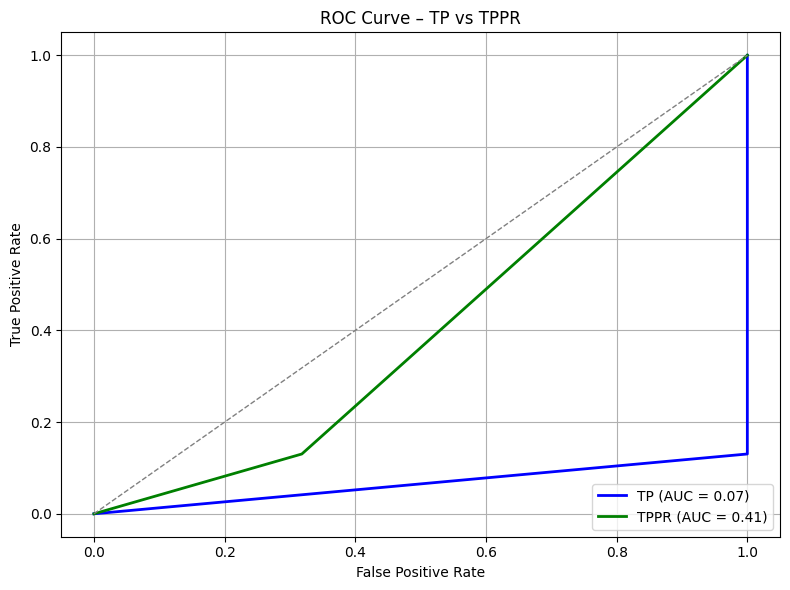

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dữ liệu thực tế và dự đoán từ hai mô hình
y_true = crash_prediction_data["kết quả"]
y_pred_tp = 1 - crash_prediction_data["crash_prediction"]  # đảo chiều vì crash_prediction: 0=crash (positive)
y_pred_tppr = 1 - crash_prediction_data2["crash_prediction"]

# Tạo "giá trị dự đoán giả định" bằng nhãn dự đoán (càng gần xác suất thì càng tốt)
fpr_tp, tpr_tp, _ = roc_curve(y_true, y_pred_tp)
roc_auc_tp = auc(fpr_tp, tpr_tp)

fpr_tppr, tpr_tppr, _ = roc_curve(y_true, y_pred_tppr)
roc_auc_tppr = auc(fpr_tppr, tpr_tppr)

# Vẽ đồ thị ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tp, tpr_tp, color='blue', lw=2, label=f'TP (AUC = {roc_auc_tp:.2f})')
plt.plot(fpr_tppr, tpr_tppr, color='green', lw=2, label=f'TPPR (AUC = {roc_auc_tppr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – TP vs TPPR')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

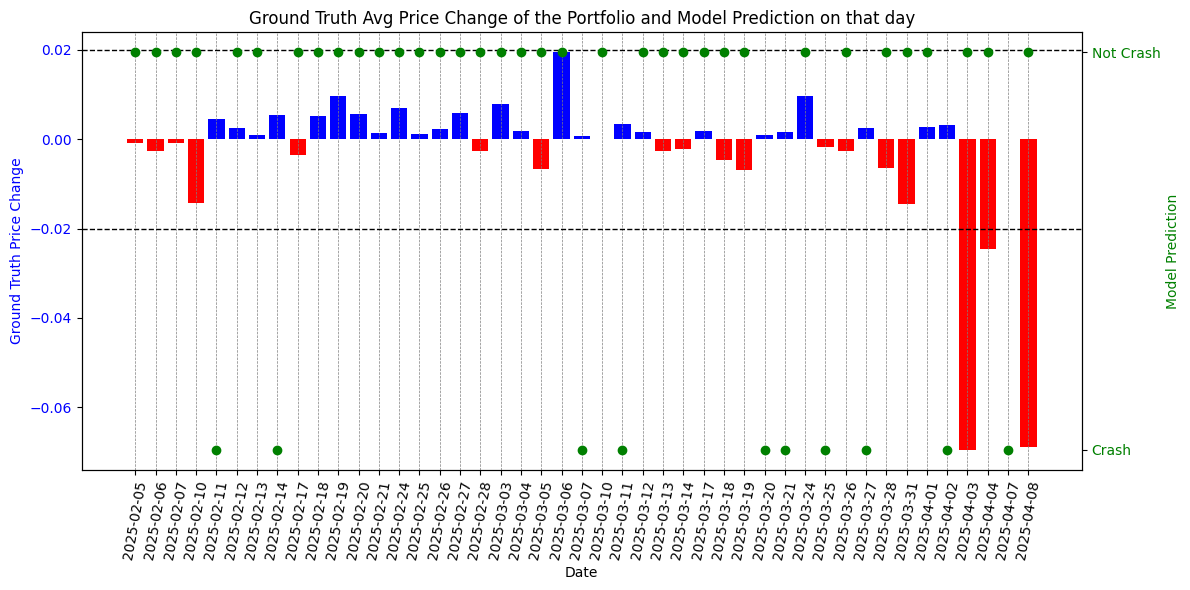

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for avg_pct_change with color based on value
colors = ['r' if x < 0 else 'b' for x in crash_prediction_data["avg_pct_change"]]

# Vẽ đường dọc cho từng ngày
for i in range(len(crash_prediction_data["time"])):
    ax1.axvline(x=crash_prediction_data["time"][i], color='gray', linestyle='--', linewidth=0.5)

# Vẽ biểu đồ cột cho avg_pct_change
ax1.bar(crash_prediction_data["time"], crash_prediction_data["avg_pct_change"], color=colors)

# Vẽ 2 đường ngưỡng tại -0.02 và 0.02
ax1.axhline(y=-0.02, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=0.02, color='black', linestyle='--', linewidth=1)

# Cài đặt nhãn trục và màu sắc
ax1.set_xlabel('Date')
ax1.set_ylabel('Ground Truth Price Change', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=80)

# Create a second y-axis for the verdict
ax2 = ax1.twinx()
ax2.scatter(crash_prediction_data["time"], crash_prediction_data["crash_prediction"], color='g', marker='o')
ax2.set_ylabel('Model Prediction', color='g')
ax2.tick_params(axis='y', labelcolor='g', labelsize=10)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Crash', 'Not Crash'])

# Tiêu đề và bố cục
plt.title('Ground Truth Avg Price Change of the Portfolio and Model Prediction on that day')
plt.xlabel('Date')

fig.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os

# Thư mục chứa file CSV
data_dir = "/content"

# Danh sách file hợp lệ
csv_files = [f for f in os.listdir(data_dir)
             if f.endswith(".csv") and "crash_predictions_" in f and "_to_" in f]

# Danh sách lưu các DataFrame
df_list = []

# Đọc và xử lý từng file
for filename in csv_files:
    file_path = os.path.join(data_dir, filename)
    try:
        df = pd.read_csv(file_path)
        if {'prediction_date', 'crash_prediction'}.issubset(df.columns):
            df_list.append(df[['prediction_date', 'crash_prediction']])
        else:
            print(f"Bỏ qua file {filename}: thiếu cột cần thiết.")
    except Exception as e:
        print(f"Lỗi khi đọc {filename}: {e}")

# Gộp tất cả thành crash4
if df_list:
    crash4 = pd.concat(df_list, ignore_index=True)
    print(f"Đã gộp {len(df_list)} file. Kích thước tổng: {crash4.shape}")
else:
    crash4 = pd.DataFrame(columns=['prediction_date', 'crash_prediction'])
    print("Không có file nào hợp lệ được gộp.")

# Tùy chọn: sắp xếp theo ngày
crash4['prediction_date'] = pd.to_datetime(crash4['prediction_date'], errors='coerce')
crash4 = crash4.sort_values('prediction_date').reset_index(drop=True)


Đã gộp 9 file. Kích thước tổng: (38, 2)


In [ ]:
crash4.head(40)

,prediction_date,crash_prediction
0,2025-02-05 01:00:00,No
1,2025-02-06 01:00:00,No
2,2025-02-07 01:00:00,No
3,2025-02-10 01:00:00,No
4,2025-02-11 01:00:00,Yes
5,2025-02-12 01:00:00,No
6,2025-02-13 01:00:00,Yes
7,2025-02-14 01:00:00,No
8,2025-02-17 01:00:00,No
9,2025-02-18 01:00:00,No


In [ ]:
import pandas as pd

# Yêu cầu 1: thêm các dòng cụ thể
manual_entries = pd.DataFrame({
    'prediction_date': [
        '2025-03-31', '2025-04-01', '2025-04-02',
        '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08'
    ],
    'crash_prediction': ['Yes'] * 7
})

# Đảm bảo cột date là datetime để sau này xử lý dễ
manual_entries['prediction_date'] = pd.to_datetime(manual_entries['prediction_date'])

# Gộp vào crash4
crash4 = pd.concat([crash4, manual_entries], ignore_index=True)

# Yêu cầu 2: đọc file crash1.csv và lấy 2 trường
crash1 = pd.read_csv('/content/crash1.csv')

# Kiểm tra sự tồn tại của các cột
required_cols = ['avg_pct_change', 'kết quả']
if all(col in crash1.columns for col in required_cols):
    # Chỉ lấy số dòng bằng với crash4 nếu cần tránh lỗi
    min_len = min(len(crash4), len(crash1))
    crash4 = crash4.iloc[:min_len].copy()
    crash1 = crash1.iloc[:min_len].copy()

    # Gộp 2 cột mới vào crash4
    crash4['avg_pct_change'] = crash1['avg_pct_change'].values
    crash4['kết quả'] = crash1['kết quả'].values
else:
    print("❌ File crash1.csv không chứa đủ 2 cột 'avg_pct_change' và 'kết quả'")


In [ ]:
crash4["crash_prediction"] = crash4["crash_prediction"].map({"Yes": 1, "No": 0})
crash4.head(5)

,prediction_date,crash_prediction,avg_pct_change,kết quả
0,2025-02-05 01:00:00,0,-0.000775,0
1,2025-02-06 01:00:00,0,-0.002680,1
2,2025-02-07 01:00:00,0,-0.000946,0
3,2025-02-10 01:00:00,0,-0.014179,0
4,2025-02-11 01:00:00,1,0.004614,0


In [ ]:
# Đảm bảo cột avg_pct_change ở dạng số
crash4['avg_pct_change'] = pd.to_numeric(crash4['avg_pct_change'], errors='coerce')

# Tạo cột true_label theo điều kiện
crash4['true_label'] = (crash4['avg_pct_change'] < -0.02).astype(int)
crash4.head(5)

,prediction_date,crash_prediction,avg_pct_change,kết quả,true_label
0,2025-02-05 01:00:00,0,-0.000775,0,0
1,2025-02-06 01:00:00,0,-0.002680,1,0
2,2025-02-07 01:00:00,0,-0.000946,0,0
3,2025-02-10 01:00:00,0,-0.014179,0,0
4,2025-02-11 01:00:00,1,0.004614,0,0


In [ ]:
crash4

,prediction_date,crash_prediction,avg_pct_change,kết quả,true_label
0,2025-02-05 01:00:00,0,-0.000775,0,0
1,2025-02-06 01:00:00,0,-0.002680,1,0
2,2025-02-07 01:00:00,0,-0.000946,0,0
3,2025-02-10 01:00:00,0,-0.014179,0,0
4,2025-02-11 01:00:00,1,0.004614,0,0
5,2025-02-12 01:00:00,0,0.002617,0,0
6,2025-02-13 01:00:00,1,0.000958,1,0
7,2025-02-14 01:00:00,0,0.005537,0,0
8,2025-02-17 01:00:00,0,-0.003521,0,0
9,2025-02-18 01:00:00,0,0.005307,1,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Chuyển dữ liệu sang định dạng int (nếu chưa)
y_pred = crash4['crash_prediction'].astype(int)
y_true = crash4['true_label'].astype(int)

# Tính các chỉ số
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)

# In kết quả
print("📊 Evaluation Metrics:")
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\n🧮 Confusion Matrix:")
print(f"TP: {cm[1,1]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TN: {cm[0,0]}")


📊 Evaluation Metrics:
✅ Accuracy:  0.8000
✅ Precision: 0.2500
✅ Recall:    1.0000
✅ F1 Score:  0.4000

🧮 Confusion Matrix:
TP: 3 | FP: 9
FN: 0 | TN: 33


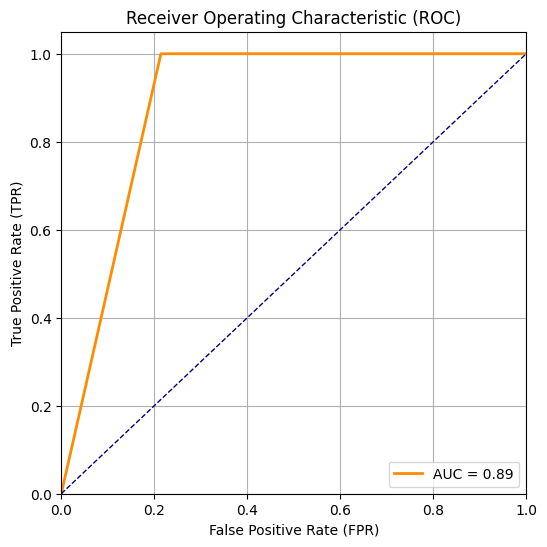

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Nếu bạn chỉ có crash_prediction dạng nhị phân (0/1), ta dùng luôn làm y_score
# Trong thực tế nên dùng xác suất (VD: từ mô hình Logistic Regression hoặc model.predict_proba)
y_true = crash4['true_label'].astype(int)
y_score = crash4['crash_prediction'].astype(int)  # thay bằng xác suất nếu có

# Tính ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

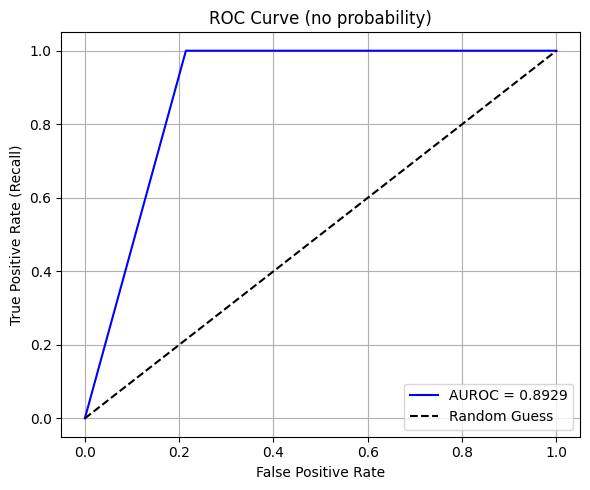

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dữ liệu
y_true = crash4['true_label'].astype(int)
y_pred = crash4['crash_prediction'].astype(int)

# Tính các điểm ROC (dù y_pred là nhị phân)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc_score = roc_auc_score(y_true, y_pred)

# Vẽ biểu đồ ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUROC = {auc_score:.4f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (no probability)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

crash4=pd.read_csv("/content/got_prediction.csv")

# Chuyển dữ liệu sang định dạng int (nếu chưa)
y_pred = crash4['GoT_prediction'].astype(int)

# Fill NaN values in 'true_label' before converting to int
# This handles cases where the merge resulted in missing avg_pct_change
y_true = crash4['true_label'].fillna(0).astype(int)

# Tính các chỉ số
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)

# In kết quả
print("📊 Evaluation Metrics:")
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\n🧮 Confusion Matrix:")
print(f"TP: {cm[1,1]} | FP: {cm[0,1]}")
print(f"FN: {cm[1,0]} | TN: {cm[0,0]}")

📊 Evaluation Metrics:
✅ Accuracy:  0.9400
✅ Precision: 0.0000
✅ Recall:    0.0000
✅ F1 Score:  0.0000

🧮 Confusion Matrix:
TP: 0 | FP: 0
FN: 3 | TN: 47


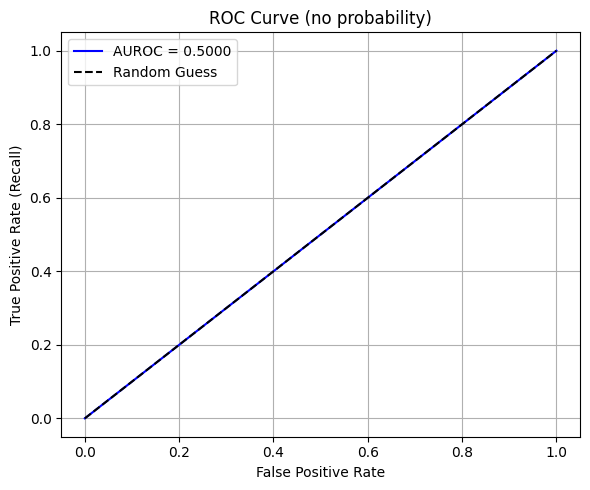

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dữ liệu
# Fill NaN values in 'true_label' before converting to int
# This handles cases where the merge resulted in missing avg_pct_change
crash4['true_label'] = crash4['true_label'].fillna(0)

y_true = crash4['true_label'].astype(int)
y_pred = crash4['GoT_prediction'].astype(int)

# Tính các điểm ROC (dù y_pred là nhị phân)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc_score = roc_auc_score(y_true, y_pred)

# Vẽ biểu đồ ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUROC = {auc_score:.4f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (no probability)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Danh sách file và tên để hiển thị
files = {
    'io_predictions': '/content/io_predictions.csv',
    'cot_predictions': '/content/cot_predictions.csv',
    'gotprediction': '/content/got_prediction.csv',
    'crash6': '/content/crash6.csv',
    'crash5': '/content/crash5.csv',
}

# Nếu bạn có file .csv, đổi tên file cho phù hợp. Nếu là dataframe trong code, thay đổi cách load tương ứng

results = []

for name, filepath in files.items():
    # Load data
    df = pd.read_csv(filepath)

    # Fill NaN values in 'true_label' before converting to int
    # This handles cases where the merge resulted in missing avg_pct_change
    # Assuming NaN in true_label should be treated as non-crash (0)
    if 'true_label' in df.columns:
        df['true_label'] = df['true_label'].fillna(0)
    else:
        # If 'true_label' is not present, you might need to re-create it
        # based on 'avg_pct_change' and the crash threshold if available
        # For this fix, we assume 'true_label' exists but might have NaNs.
        print(f"Warning: 'true_label' column not found in {filepath}. Skipping evaluation for this file.")
        continue # Skip to the next file

    # Chuyển dữ liệu sang int nếu chưa
    # Ensure 'crash_prediction' is also handled if it might contain non-integer types
    if 'crash_prediction' in df.columns:
         y_pred = df['crash_prediction'].astype(int)
    elif 'GoT_prediction' in df.columns and name == 'gotprediction':
         # Handle the specific case for gotprediction file
         y_pred = df['GoT_prediction'].astype(int)
    else:
        print(f"Warning: 'crash_prediction' or 'GoT_prediction' column not found in {filepath}. Skipping evaluation for this file.")
        continue # Skip to the next file


    y_true = df['true_label'].astype(int)

    # Check if y_true and y_pred have the same length before calculating metrics
    if len(y_true) != len(y_pred):
         print(f"Warning: Length mismatch between 'true_label' ({len(y_true)}) and prediction ({len(y_pred)}) in {filepath}. Skipping evaluation for this file.")
         continue # Skip to the next file


    # Tính các chỉ số
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    # Lấy các giá trị TP, FP, FN, TN
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]

    results.append({
        'File': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN
    })

# Tạo dataframe kết quả để dễ nhìn
results_df = pd.DataFrame(results)

# In bảng so sánh
print(results_df)

              File  Accuracy  Precision    Recall  F1 Score  TP  FP  FN  TN
0   io_predictions  0.775510       0.00  0.000000  0.000000   0   8   3  38
1  cot_predictions  0.666667       0.00  0.000000  0.000000   0  12   3  30
2    gotprediction  0.940000       0.00  0.000000  0.000000   0   0   3  47
3           crash6  0.511111       0.12  1.000000  0.214286   3  22   0  20
4           crash5  0.844444       0.25  0.666667  0.363636   2   6   1  36


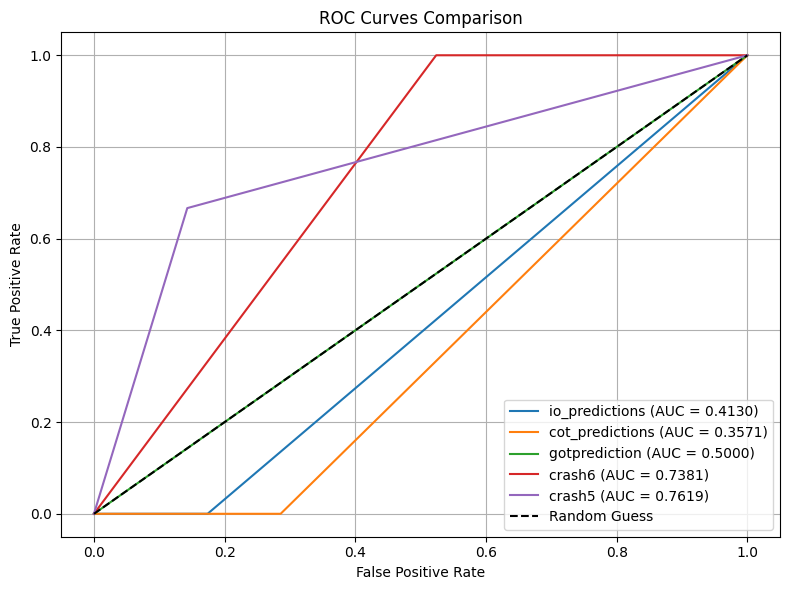

In [19]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Danh sách file và tên để hiển thị
files = {
    'io_predictions': '/content/io_predictions.csv',
    'cot_predictions': '/content/cot_predictions.csv',
    'gotprediction': '/content/got_prediction.csv',
    'crash6': '/content/crash6.csv',
    'crash5': '/content/crash5.csv',
}

plt.figure(figsize=(8, 6))

for name, filepath in files.items():
    df = pd.read_csv(filepath)

    # Fill NaN và chuyển kiểu
    y_true = df['true_label'].fillna(0).astype(int)
    y_pred = df['crash_prediction'].fillna(0).astype(int)

    # Tính ROC curve và AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)

    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

# Đường chéo random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()